In [37]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential, layers

In [38]:
train_datagen = ImageDataGenerator(
                rescale=1./255, # rescale pixel values to [0,1]
                shear_range=0.2, # apply random shear transformation
                zoom_range=0.2, # apply random zoom transformation
                horizontal_flip=True # flip images horizontally
            )


val_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
train_generator = train_datagen.flow_from_directory(
                    '../cat_and_dog/cat-dog-data/training_set/training_set', # path to training data
                    target_size=(224, 224), # resize images to (64,64)
                    batch_size=32, # batch size for training
                    class_mode='binary' # classification mode (binary or categorical)
                )
val_generator = val_datagen.flow_from_directory(
                    '../cat_and_dog/cat-dog-data/test_set/test_set', # path to validation data
                    target_size=(224, 224), # resize images to (64,64)
                    batch_size=32, # batch size for validation
                    class_mode='binary' # classification mode (binary or categorical)
                )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


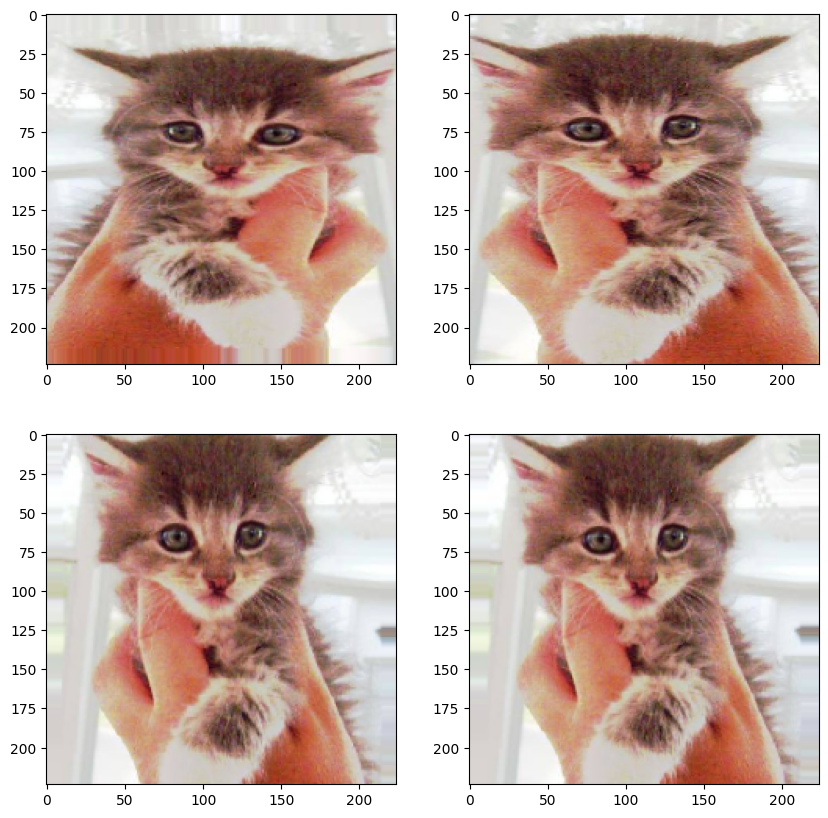

In [40]:
img_path = '../cat_and_dog/cat-dog-data/training_set/training_set/cats/cat.100.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

# Convert the image to a NumPy array
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Generate and display augmented images
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()
for i, batch in enumerate(train_datagen.flow(x, batch_size=1)):
    ax[i].imshow(batch[0])
    if i == 3:
        break
plt.show()

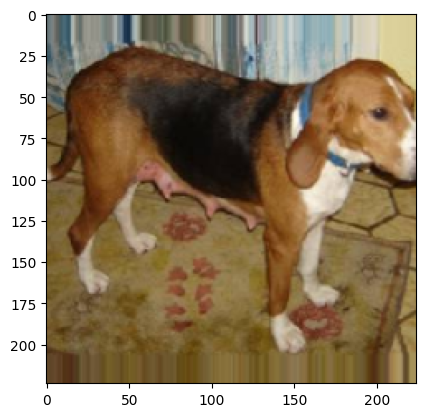

In [41]:
x, y = train_generator.next()
image = x[0]
plt.imshow(image)
plt.show()

In [42]:
model = Sequential(
            [
                layers.Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)),
                layers.MaxPool2D((2,2)),
                
                layers.Conv2D(64,(3,3), activation='relu'),
                layers.MaxPool2D((2,2)),
                
                layers.Conv2D(128,(3,3), activation='relu'),
                layers.MaxPool2D((2,2)),
                
                layers.Conv2D(128,(3,3), activation='relu'),
                layers.MaxPool2D((2,2)),
                
                layers.Flatten(),
                layers.Dense(512, activation='relu'),
                layers.Dense(1, activation='sigmoid')
             ]
)

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 26, 26, 128)      

In [44]:
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history = model.fit(train_generator,epochs=25, validation_data=val_generator)

Epoch 1/25
251/251 [==============================] - 36s 139ms/step - loss: 0.6916 - accuracy: 0.5413 - val_loss: 0.6325 - val_accuracy: 0.6708
Epoch 2/25
251/251 [==============================] - 35s 139ms/step - loss: 0.6262 - accuracy: 0.6523 - val_loss: 0.6581 - val_accuracy: 0.6021
Epoch 3/25
251/251 [==============================] - 35s 138ms/step - loss: 0.5658 - accuracy: 0.7156 - val_loss: 0.5191 - val_accuracy: 0.7380
Epoch 4/25
251/251 [==============================] - 35s 140ms/step - loss: 0.5302 - accuracy: 0.7388 - val_loss: 0.5038 - val_accuracy: 0.7642
Epoch 5/25
251/251 [==============================] - 35s 138ms/step - loss: 0.4870 - accuracy: 0.7625 - val_loss: 0.4560 - val_accuracy: 0.7963
Epoch 6/25
251/251 [==============================] - 35s 138ms/step - loss: 0.4567 - accuracy: 0.7879 - val_loss: 0.4617 - val_accuracy: 0.7998
Epoch 7/25
251/251 [==============================] - 34s 137ms/step - loss: 0.4380 - accuracy: 0.8004 - val_loss: 0.4344 - val_ac